In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import itertools
from collections import defaultdict


In [6]:
df = pd.read_csv('StudentPerformanceFactors.csv')

max_hours_tutoring = df['Tutoring_Sessions'].max()
df['Tuturing_Sessions_bin'] = pd.cut(df['Tutoring_Sessions'], bins=[0, max_hours_tutoring/4, max_hours_tutoring/2, max_hours_tutoring + 1], labels=['Low Tutoring Hours', 'Medium Tutoring Hours', 'High Tutoring Hours'], right=False)



df['Family_Income_bin'] = 'Family Income: ' + df['Family_Income'].astype(str)

df['Parental_Education_bin'] = 'Parental Education: ' + df['Parental_Education_Level'].astype(str)

df['Access_Resources_bin'] = 'Access_to_Resources: ' + df['Access_to_Resources'].astype(str)

#df = df.iloc[:50]


G = nx.Graph()
for idx, row in df.iterrows():
    G.add_node(idx, bipartite=0, exam_score=row['Exam_Score'])
    G.nodes[idx]['Family Income'] = row['Family_Income']
    G.nodes[idx]['Tutoring_Sessions'] = row['Tuturing_Sessions_bin']

for idx1, row in df.iterrows():
    factors = {'Family Income': row['Family_Income']}

    for idx2, row2 in df.iterrows():
        if idx2 <= idx1:
            continue

        if (row['Family_Income'] == row2['Family_Income']):
            G.add_edge(idx1, idx2)

        if (row['Tuturing_Sessions_bin'] == row2['Tuturing_Sessions_bin']):
            G.add_edge(idx1, idx2)


plt.figure(figsize=(12, 8))
nx.draw(G, node_size=10)
plt.show()

KeyboardInterrupt: 

In [2]:
# Let us here implement the adoption strategy
# Our update rule is: if the majority of my neighbours have adopted a different action than the one I have, then I change my action as well
# At the same time, we will be keeping track of the correct colours for each node


def update_rule(G):

    colours = []
    new_actions = {}

    
    for node in G.nodes():
        cur_action = G.nodes[node]['action']
        if cur_action == 'A':
            new_actions[node] = 'A'
            continue

        node_neighbors = list(G.neighbors(node))
        neighbors_actions = [G.nodes[i]['action'] for i in node_neighbors]

        count_A = neighbors_actions.count('A')
        count_B = neighbors_actions.count('B')

        ratio = count_A/(count_A + count_B)

        if G.nodes[node]['Family Income'] == 'Low':
            # if random.random()*2 <= ratio:
            if random.random()*4 <= ratio:
                new_actions[node] = 'A'
            else:
                new_actions[node] = 'B'
        elif G.nodes[node]['Family Income'] == 'Medium':
            #if random.random() <= ratio:
            if random.random()*2 <= ratio:
                new_actions[node] = 'A'
            else:
                new_actions[node] = 'B'
        elif G.nodes[node]['Family Income'] == 'High':
            #if random.random()/2 <= ratio:
            if random.random() <= ratio:
                new_actions[node] = 'A'
            else:
                new_actions[node] = 'B'


    for node in G.nodes():
        G.nodes[node]['action'] = new_actions[node]
        if new_actions[node] == 'A':
            colours.append('green')
        else:
            colours.append('red')


    return G, colours

In [3]:
## Let us now initialize our graph : that means, we should assign each node an action (and a colour).
## That would be the graph's initial state
## To keep things simple, we will randomly pick an action for each node


def initialize_graph(G):
    
    actions = ['A', 'B'] #A = phone, B = no phone
    node_colours =[]
    
    for node in G.nodes():
        if node_colours == []:
            G.nodes[node]['action'] = 'A'
            node_colours.append('green')
        else:
            G.nodes[node]['action'] = 'B'
            node_colours.append('red')
        
        
    print('The initialized graph has {} nodes with a phone and {} nodes without a phone.'.format(node_colours.count('green'), node_colours.count('red')))

    return G, node_colours


In [4]:
G, G_colors = initialize_graph(G)
nx.draw(G, node_color = G_colors, with_labels = True)

NameError: name 'G' is not defined

In [5]:
# Let us here implement the adoption strategy
# Our update rule is: if the majority of my neighbours have adopted a different action than the one I have, then I change my action as well
# At the same time, we will be keeping track of the correct colours for each node


def update_rule2(G):

    colours = []
    new_actions = {}

    
    for node in G.nodes():
        cur_action = G.nodes[node]['action']
        if cur_action == 'A':
            new_actions[node] = 'A'
            continue

        node_neighbors = list(G.neighbors(node))
        neighbors_actions = [G.nodes[i]['action'] for i in node_neighbors]

        count_A = neighbors_actions.count('A')
        count_B = neighbors_actions.count('B')

        ratio = count_A/(count_A + count_B)

        if G.nodes[node]['Family Income'] == 'Low':
            # if random.random()*2 <= ratio:
            if random.random()*2 <= ratio:
                new_actions[node] = 'A'
            else:
                new_actions[node] = 'B'
        elif G.nodes[node]['Family Income'] == 'Medium':
            #if random.random() <= ratio:
            if random.random() <= ratio:
                new_actions[node] = 'A'
            else:
                new_actions[node] = 'B'
        elif G.nodes[node]['Family Income'] == 'High':
            #if random.random()/2 <= ratio:
            if random.random()/2 <= ratio:
                new_actions[node] = 'A'
            else:
                new_actions[node] = 'B'


    for node in G.nodes():
        G.nodes[node]['action'] = new_actions[node]
        if new_actions[node] == 'A':
            colours.append('green')
        else:
            colours.append('red')


    return G, colours

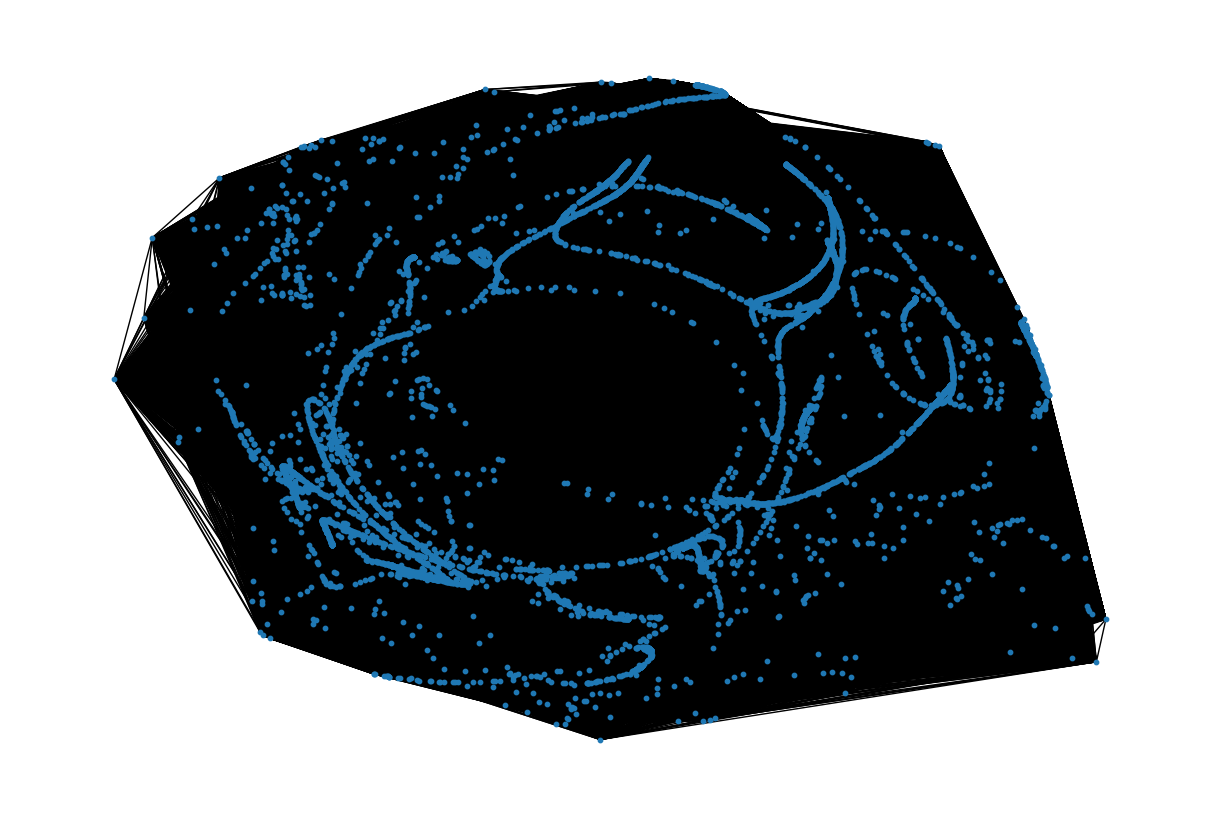

The initialized graph has 1 nodes with a phone and 6606 nodes without a phone.
Iteration No.: 0 has 2 nodes with a phone and 6605 nodes without a phone.


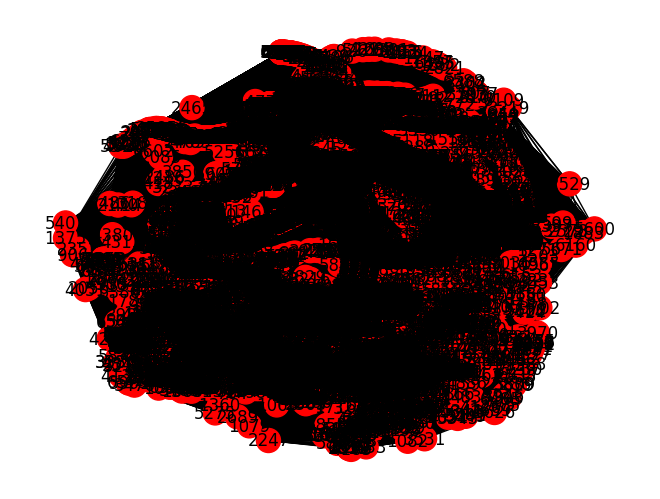

Iteration No.: 1 has 3 nodes with a phone and 6604 nodes without a phone.


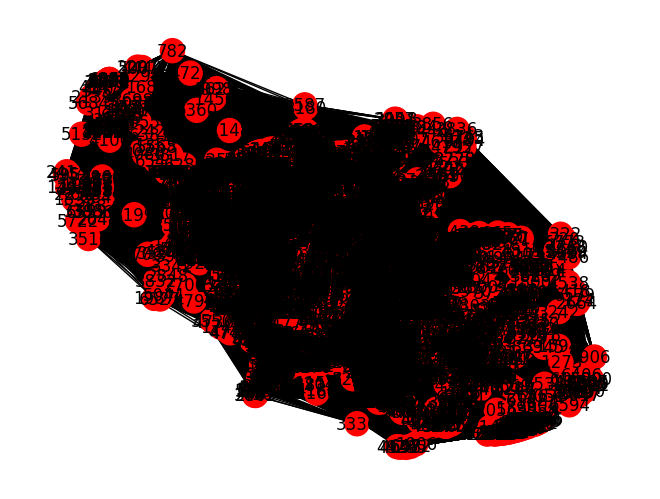

Iteration No.: 2 has 7 nodes with a phone and 6600 nodes without a phone.


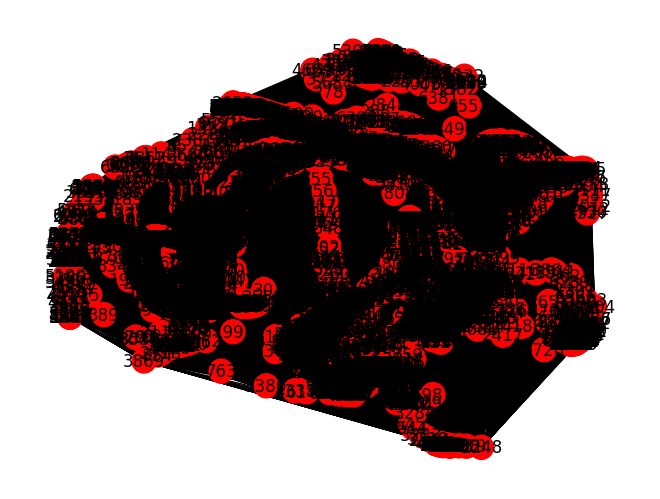

Iteration No.: 3 has 9 nodes with a phone and 6598 nodes without a phone.


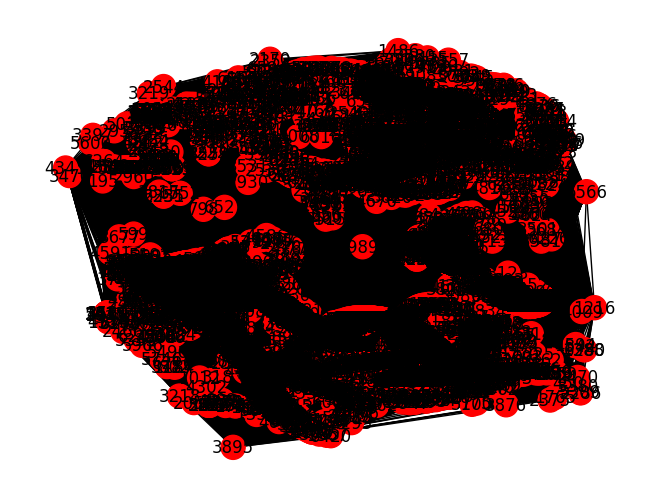

Iteration No.: 4 has 17 nodes with a phone and 6590 nodes without a phone.


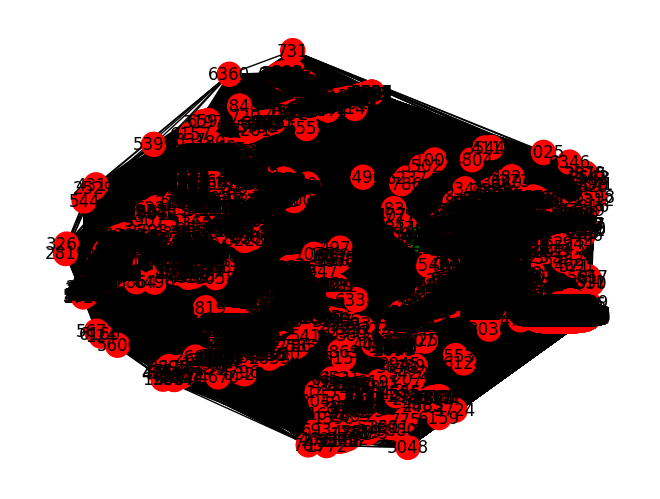

Iteration No.: 5 has 45 nodes with a phone and 6562 nodes without a phone.


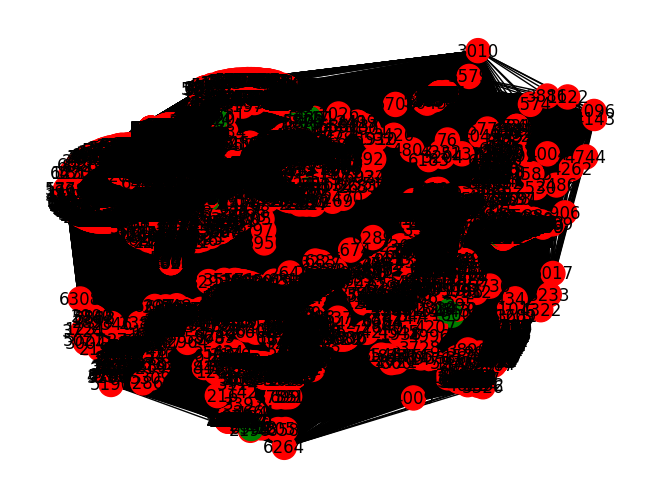

Iteration No.: 6 has 99 nodes with a phone and 6508 nodes without a phone.


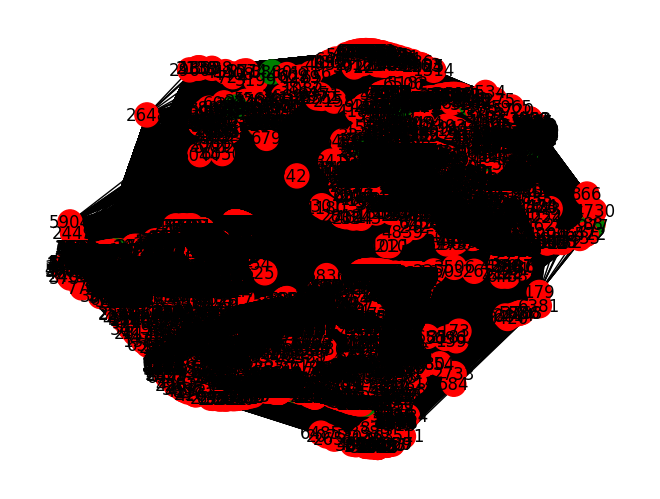

Iteration No.: 7 has 185 nodes with a phone and 6422 nodes without a phone.


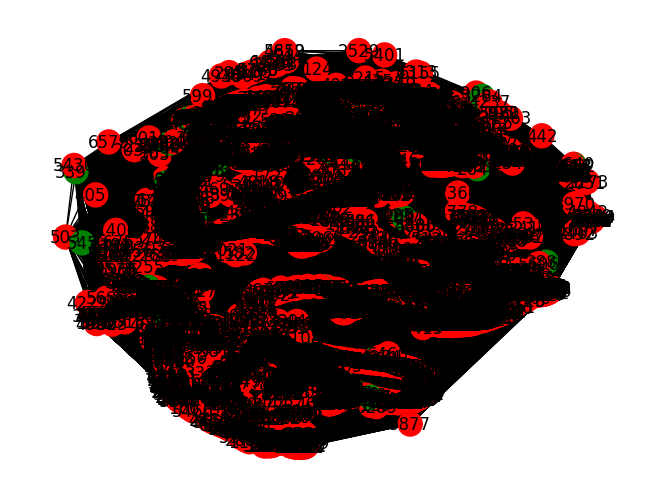

Iteration No.: 8 has 369 nodes with a phone and 6238 nodes without a phone.


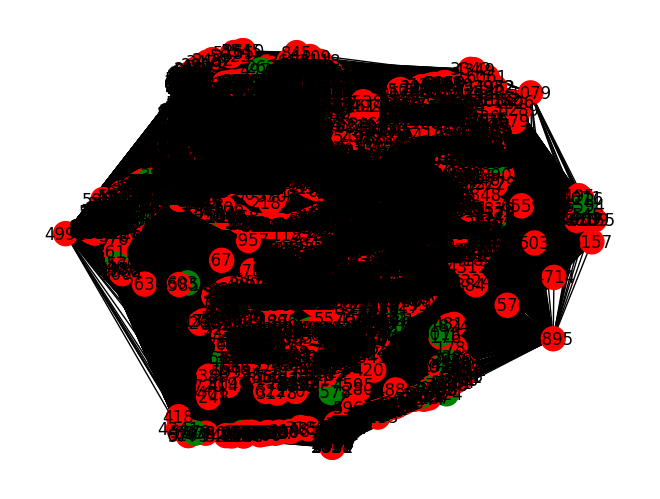

Iteration No.: 9 has 741 nodes with a phone and 5866 nodes without a phone.


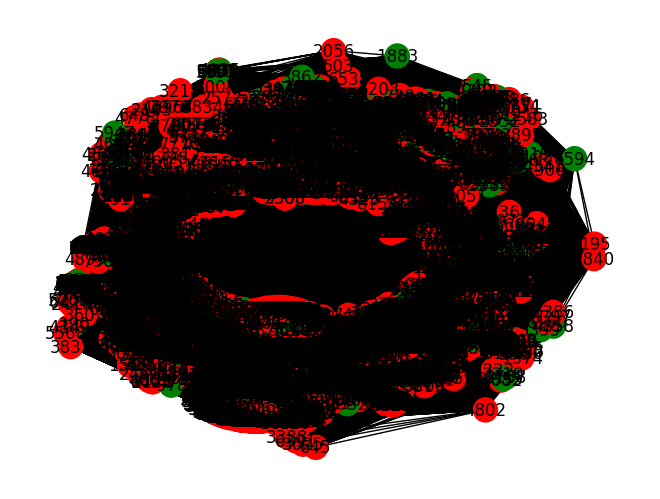

Iteration No.: 10 has 1391 nodes with a phone and 5216 nodes without a phone.


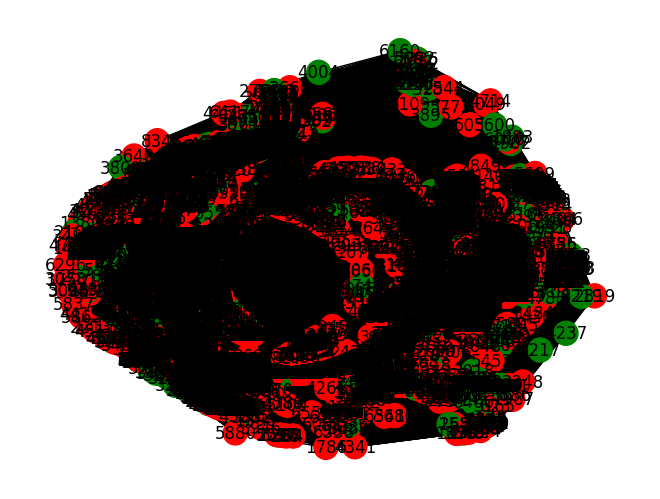

Iteration No.: 11 has 2355 nodes with a phone and 4252 nodes without a phone.


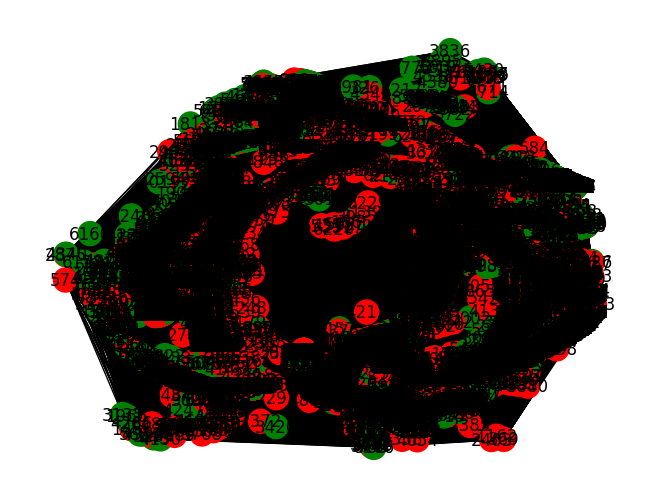

Iteration No.: 12 has 3581 nodes with a phone and 3026 nodes without a phone.


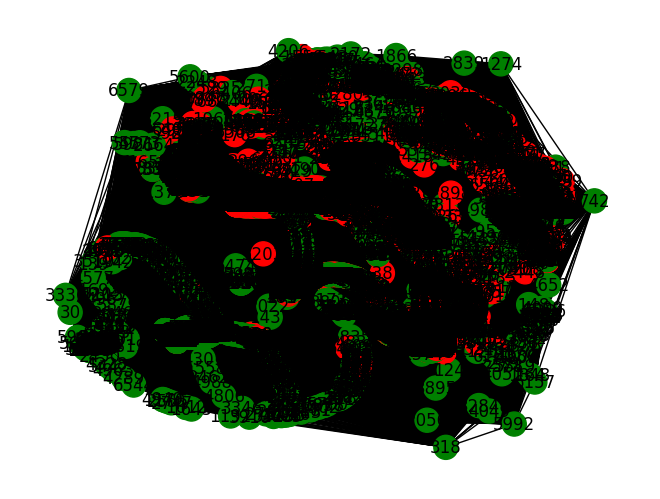

Iteration No.: 13 has 4681 nodes with a phone and 1926 nodes without a phone.


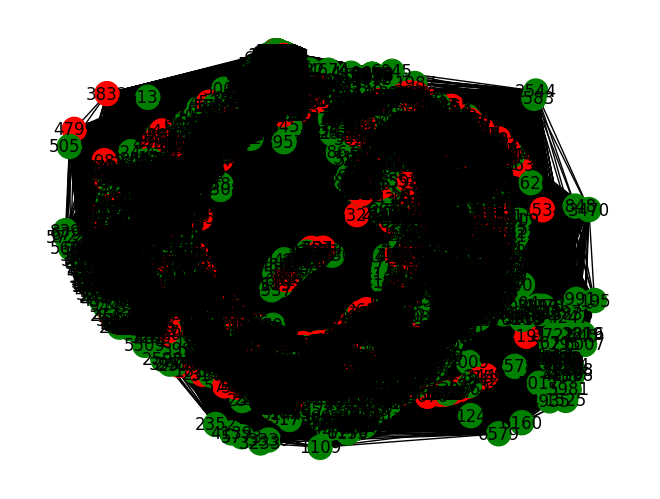

Iteration No.: 14 has 5455 nodes with a phone and 1152 nodes without a phone.


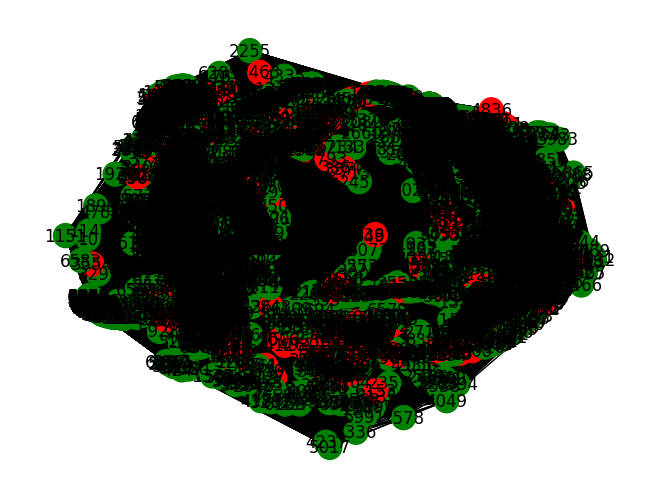

Iteration No.: 15 has 5929 nodes with a phone and 678 nodes without a phone.


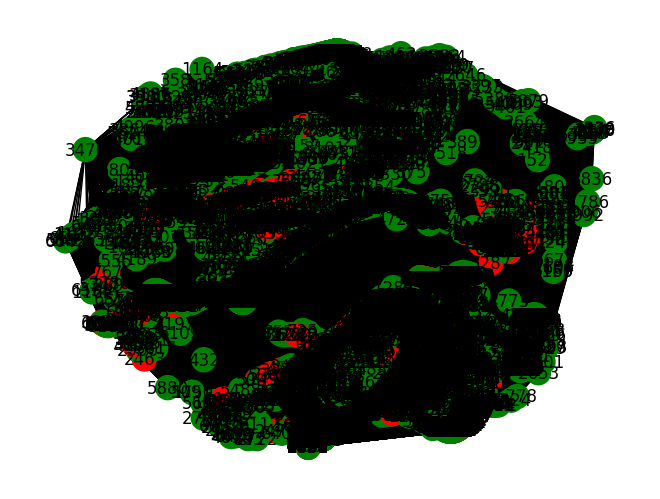

Iteration No.: 16 has 6225 nodes with a phone and 382 nodes without a phone.


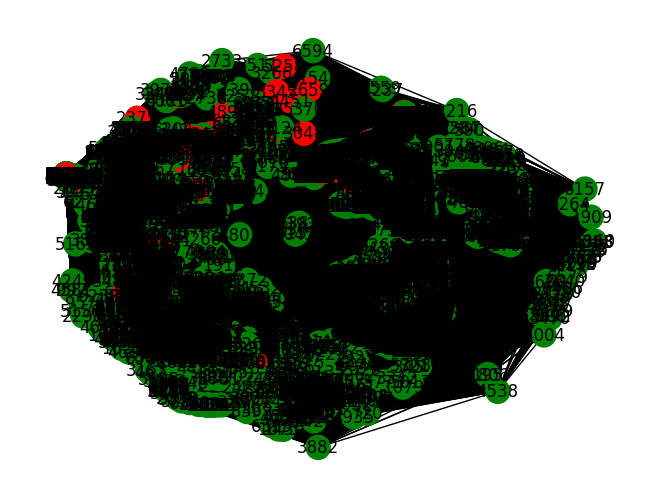

Iteration No.: 17 has 6407 nodes with a phone and 200 nodes without a phone.


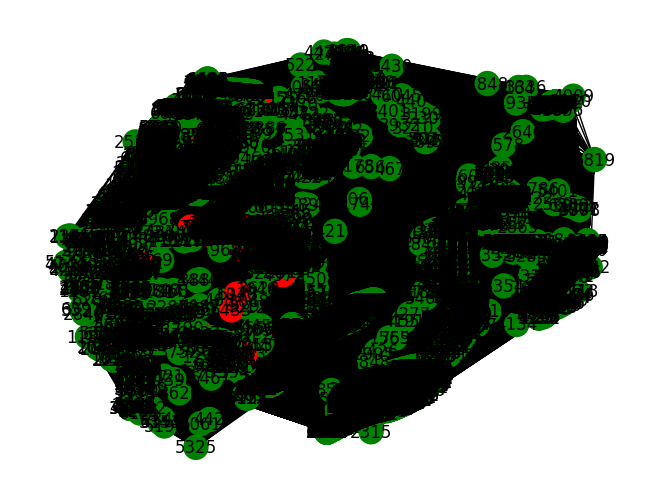

Iteration No.: 18 has 6502 nodes with a phone and 105 nodes without a phone.


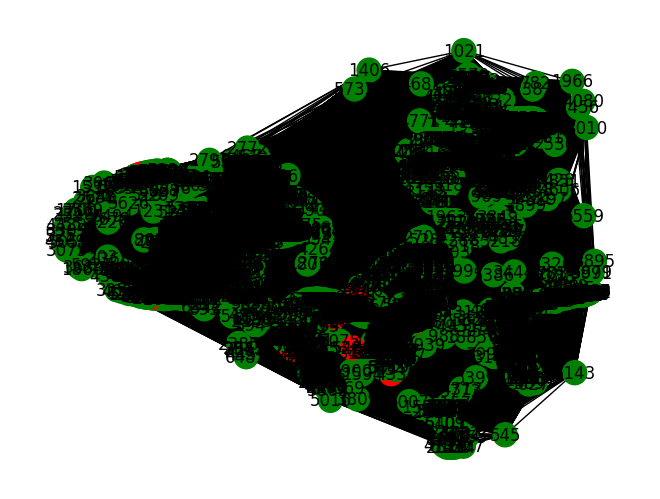

Iteration No.: 19 has 6560 nodes with a phone and 47 nodes without a phone.


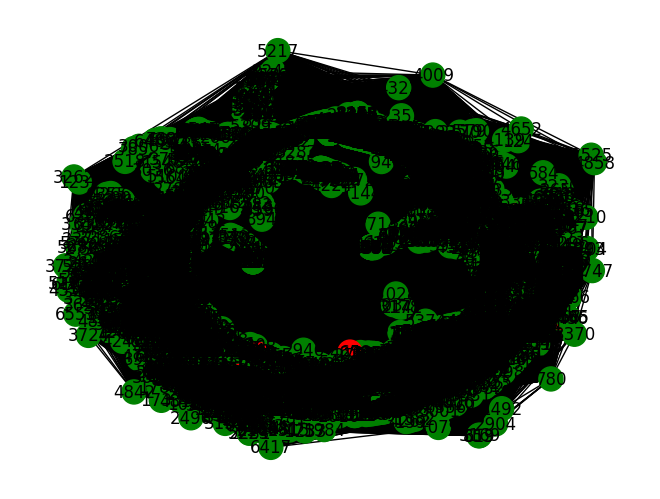

{'bipartite': 0, 'exam_score': 66, 'Family Income': 'Low', 'Tutoring_Sessions': 'Low Tutoring Hours', 'action': 'B'}
{'bipartite': 0, 'exam_score': 69, 'Family Income': 'Low', 'Tutoring_Sessions': 'Low Tutoring Hours', 'action': 'B'}
{'bipartite': 0, 'exam_score': 69, 'Family Income': 'Low', 'Tutoring_Sessions': 'Low Tutoring Hours', 'action': 'B'}
{'bipartite': 0, 'exam_score': 64, 'Family Income': 'Low', 'Tutoring_Sessions': 'Medium Tutoring Hours', 'action': 'B'}
{'bipartite': 0, 'exam_score': 68, 'Family Income': 'Low', 'Tutoring_Sessions': 'Low Tutoring Hours', 'action': 'B'}
{'bipartite': 0, 'exam_score': 67, 'Family Income': 'Low', 'Tutoring_Sessions': 'High Tutoring Hours', 'action': 'B'}
{'bipartite': 0, 'exam_score': 68, 'Family Income': 'Low', 'Tutoring_Sessions': 'High Tutoring Hours', 'action': 'B'}
{'bipartite': 0, 'exam_score': 72, 'Family Income': 'Low', 'Tutoring_Sessions': 'Low Tutoring Hours', 'action': 'B'}
{'bipartite': 0, 'exam_score': 65, 'Family Income': 'Low', 

In [8]:
#combine to use for single run

df = pd.read_csv('StudentPerformanceFactors.csv')

max_hours_tutoring = df['Tutoring_Sessions'].max()
df['Tuturing_Sessions_bin'] = pd.cut(df['Tutoring_Sessions'], bins=[0, max_hours_tutoring/4, max_hours_tutoring/2, max_hours_tutoring + 1], labels=['Low Tutoring Hours', 'Medium Tutoring Hours', 'High Tutoring Hours'], right=False)



df['Family_Income_bin'] = 'Family Income: ' + df['Family_Income'].astype(str)

df['Parental_Education_bin'] = 'Parental Education: ' + df['Parental_Education_Level'].astype(str)

df['Access_Resources_bin'] = 'Access_to_Resources: ' + df['Access_to_Resources'].astype(str)

#df = df.iloc[:50]


G = nx.Graph()
for idx, row in df.iterrows():
    G.add_node(idx, bipartite=0, exam_score=row['Exam_Score'])
    G.nodes[idx]['Family Income'] = row['Family_Income']
    G.nodes[idx]['Tutoring_Sessions'] = row['Tuturing_Sessions_bin']

for idx1, row in df.iterrows():
    factors = {'Family Income': row['Family_Income']}

    for idx2, row2 in df.iterrows():
        if idx2 <= idx1:
            continue

        if (row['Family_Income'] == row2['Family_Income']):
            G.add_edge(idx1, idx2)

        if (row['Tuturing_Sessions_bin'] == row2['Tuturing_Sessions_bin']):
            G.add_edge(idx1, idx2)


plt.figure(figsize=(12, 8))
nx.draw(G, node_size=10)
plt.show()





G, G_colors = initialize_graph(G)
nx.draw(G, node_color = G_colors, with_labels = True)


for i in range(20) :
    _, G_colours = update_rule2(G)
    print('Iteration No.: {} has {} nodes with a phone and {} nodes without a phone.'.format(i, G_colours.count('green'), G_colours.count('red')))
    nx.draw(G, node_color = G_colours, with_labels = True)
    plt.show()


node_list = G.nodes()
for node in node_list:
    if node_list[node]['action'] == 'B':
        print(node_list[node])

In [12]:
no_phone = [node_list[x] for x in node_list if node_list[x]['action'] == 'B']
print(no_phone)


[{'bipartite': 0, 'exam_score': 66, 'Family Income': 'Low', 'Tutoring_Sessions': 'Low Tutoring Hours', 'action': 'B'}, {'bipartite': 0, 'exam_score': 69, 'Family Income': 'Low', 'Tutoring_Sessions': 'Low Tutoring Hours', 'action': 'B'}, {'bipartite': 0, 'exam_score': 69, 'Family Income': 'Low', 'Tutoring_Sessions': 'Low Tutoring Hours', 'action': 'B'}, {'bipartite': 0, 'exam_score': 64, 'Family Income': 'Low', 'Tutoring_Sessions': 'Medium Tutoring Hours', 'action': 'B'}, {'bipartite': 0, 'exam_score': 68, 'Family Income': 'Low', 'Tutoring_Sessions': 'Low Tutoring Hours', 'action': 'B'}, {'bipartite': 0, 'exam_score': 67, 'Family Income': 'Low', 'Tutoring_Sessions': 'High Tutoring Hours', 'action': 'B'}, {'bipartite': 0, 'exam_score': 68, 'Family Income': 'Low', 'Tutoring_Sessions': 'High Tutoring Hours', 'action': 'B'}, {'bipartite': 0, 'exam_score': 72, 'Family Income': 'Low', 'Tutoring_Sessions': 'Low Tutoring Hours', 'action': 'B'}, {'bipartite': 0, 'exam_score': 65, 'Family Income'

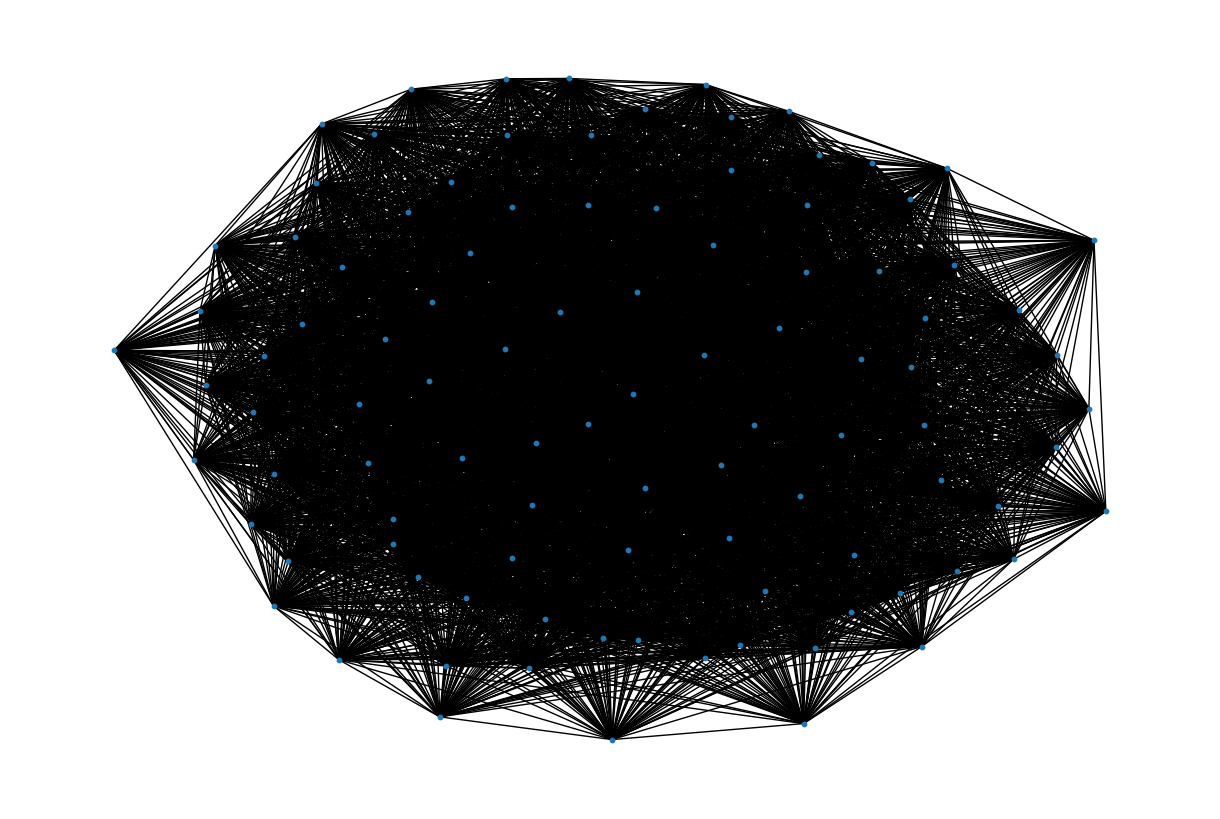

In [14]:
df_sample = df.iloc[:100]


G_sample = nx.Graph()

for idx, row in df_sample.iterrows():
    G_sample.add_node(idx, bipartite=0, exam_score=row['Exam_Score'])
    G_sample.nodes[idx]['Family Income'] = row['Family_Income']
    G_sample.nodes[idx]['Tutoring_Sessions'] = row['Tuturing_Sessions_bin']
    G_sample.nodes[idx]['Parental_Education'] = row['Parental_Education_bin']
    G_sample.nodes[idx]['Access_Resources'] = row['Access_Resources_bin']

for idx1, row in df_sample.iterrows():
    factors = {'Family Income': row['Family_Income']}

    for idx2, row2 in df_sample.iterrows():
        if idx2 <= idx1:
            continue

        if (row['Family_Income'] == row2['Family_Income']):
            G_sample.add_edge(idx1, idx2)

        if (row['Tuturing_Sessions_bin'] == row2['Tuturing_Sessions_bin']):
            G_sample.add_edge(idx1, idx2)

        if (row['Parental_Education_bin'] == row2['Parental_Education_bin']):
            G_sample.add_edge(idx1, idx2)

        if (row['Access_Resources_bin'] == row2['Access_Resources_bin']):
            G_sample.add_edge(idx1, idx2)


plt.figure(figsize=(12, 8))
nx.draw(G_sample, node_size=10)
plt.show()

In [13]:
B = nx.Graph()

for idx, row in df.iterrows():
    student_node = idx
    B.add_node(student_node, bipartite=0, exam_score=row['Exam_Score'])
    factors = {'Family_Income': row['Family_Income'], 'Tutoring_Sessions': row['Tuturing_Sessions_bin'], 'Parental_Education': row['Parental_Education_bin'], 'Access_Resources': row['Access_Resources_bin']}
    for factor, category in factors.items():
        category_node = f"{factor}: {category}"
        B.add_node(category_node, bipartite=1)
        B.add_edge(student_node, category_node)

student_nodes = {n for n, d in B.nodes(data=True) if d.get('bipartite') == 0}
category_nodes = set(B) - student_nodes

/Users/willdeley/data/ComplexNetworks/my-venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


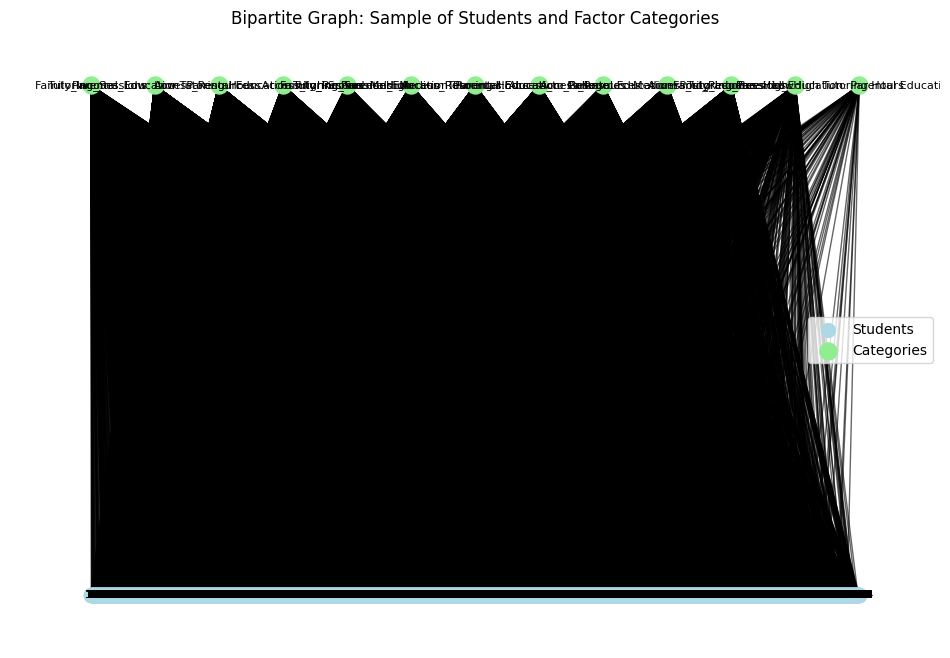

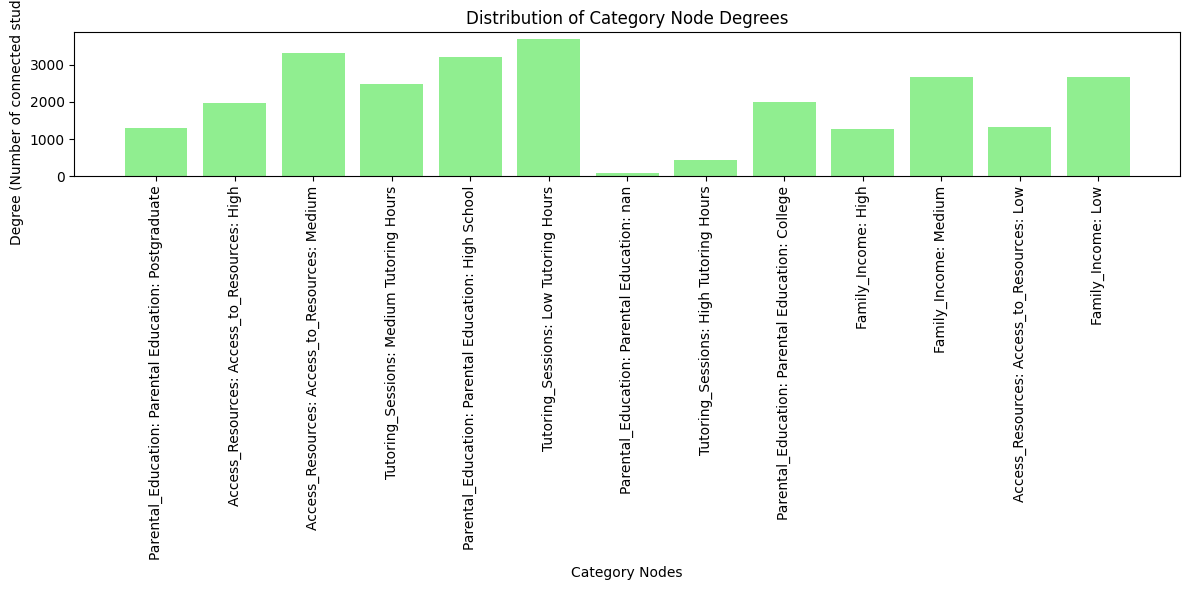

In [14]:
# do analysis on connectivity and node count
pos = nx.bipartite_layout(B, student_nodes, align='horizontal')

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(B, pos, nodelist=student_nodes, node_color='lightblue', node_size=100, label='Students')
nx.draw_networkx_nodes(B, pos, nodelist=category_nodes, node_color='lightgreen', node_size=150, label='Categories')
nx.draw_networkx_edges(B, pos, alpha=0.6)
nx.draw_networkx_labels(B, pos, font_size=8)
plt.title("Bipartite Graph: Sample of Students and Factor Categories")
plt.axis('off')
plt.legend(scatterpoints=1)
plt.show()

category_degrees = {node: B.degree(node) for node in category_nodes}

plt.figure(figsize=(12, 6))
plt.bar(category_degrees.keys(), category_degrees.values(), color='lightgreen')
plt.xticks(rotation=90)
plt.xlabel('Category Nodes')
plt.ylabel('Degree (Number of connected students)')
plt.title('Distribution of Category Node Degrees')
plt.tight_layout()
plt.show()

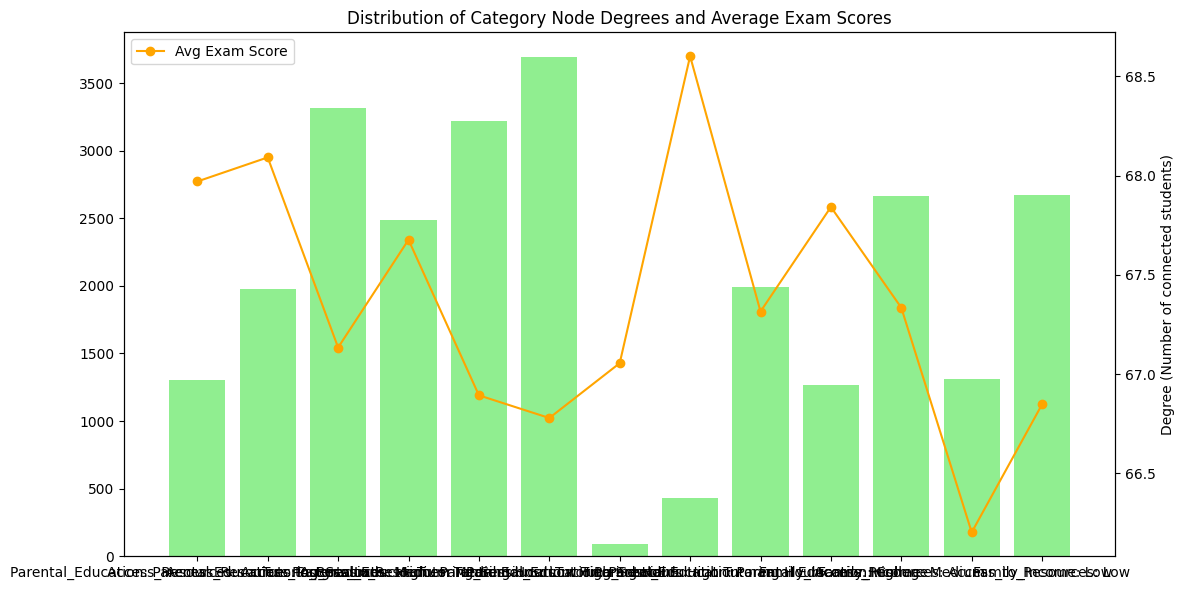

In [ ]:
average_exam_scores = {}

for category_node in category_nodes:
    connected_students = list(B.neighbors(category_node))
    
    exam_scores = [B.nodes[student]['exam_score'] for student in connected_students]
    
    if exam_scores:  
        average_exam_scores[category_node] = sum(exam_scores) / len(exam_scores)
    else:
        average_exam_scores[category_node] = 0  

category_degrees = {node: B.degree(node) for node in category_nodes}

plt.figure(figsize=(12, 6))

plt.bar(category_degrees.keys(), category_degrees.values(), color='lightgreen', label='Degree')

plt.twinx()

plt.plot(list(average_exam_scores.keys()), list(average_exam_scores.values()), color='orange', marker='o', label='Avg Exam Score')

plt.xticks(rotation=90)
plt.xlabel('Category Nodes')
plt.ylabel('Degree (Number of connected students)')
plt.title('Distribution of Category Node Degrees and Average Exam Scores')

plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [18]:
print(len(B.edges()))
print(nx.average_clustering(B))

26428
0.0


In [ ]:
score_bins = range(0, 110, 10)
binned_students = defaultdict(list)

for student in student_nodes:
    score = B.nodes[student]['exam_score']
    for start in score_bins:
        if start <= score < start + 10 or (start == 100 and score == 100):
            binned_students[(start, start + 10)].append(student)
            break

for bin_range, students in binned_students.items():
    print(f"Score Bin {bin_range}: {len(students)} students")
    
    category_counter = defaultdict(int)
    for student in students:
        for neighbor in B.neighbors(student):
            category_counter[neighbor] += 1

    sorted_categories = sorted(category_counter.items(), key=lambda x: x[1], reverse=True)
    print("  Top categories:")
    for category, count in sorted_categories[:5]:
        print(f"    {category}: {count} connections")
    print()

Score Bin (60, 70): 4914 students
  Top categories:
    Tutoring_Sessions: Low Tutoring Hours: 2874 connections
    Access_Resources: Access_to_Resources: Medium: 2542 connections
    Parental_Education: Parental Education: High School: 2493 connections
    Family_Income: Low: 2070 connections
    Family_Income: Medium: 1954 connections

Score Bin (70, 80): 1577 students
  Top categories:
    Tutoring_Sessions: Low Tutoring Hours: 738 connections
    Access_Resources: Access_to_Resources: Medium: 727 connections
    Tutoring_Sessions: Medium Tutoring Hours: 680 connections
    Family_Income: Medium: 671 connections
    Parental_Education: Parental Education: High School: 663 connections

Score Bin (100, 110): 2 students
  Top categories:
    Family_Income: High: 2 connections
    Access_Resources: Access_to_Resources: Medium: 2 connections
    Tutoring_Sessions: Medium Tutoring Hours: 1 connections
    Parental_Education: Parental Education: College: 1 connections
    Tutoring_Sessions

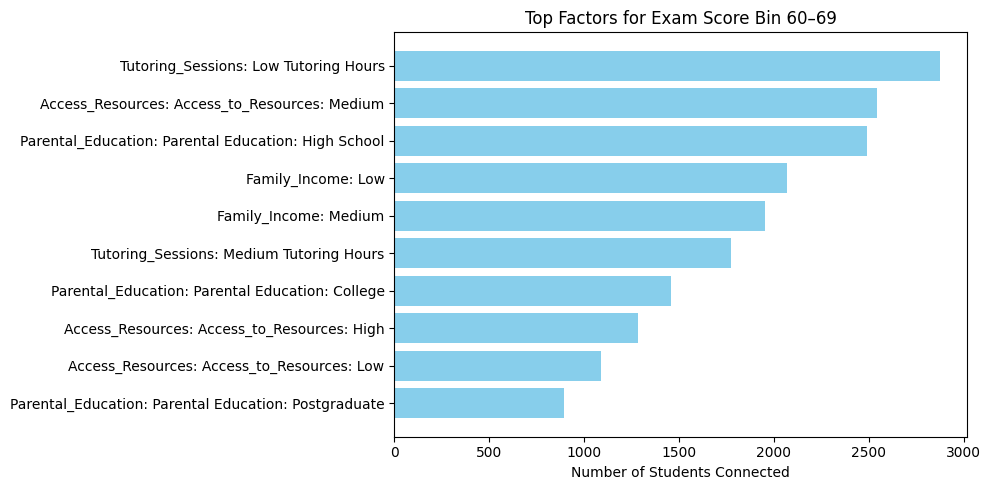

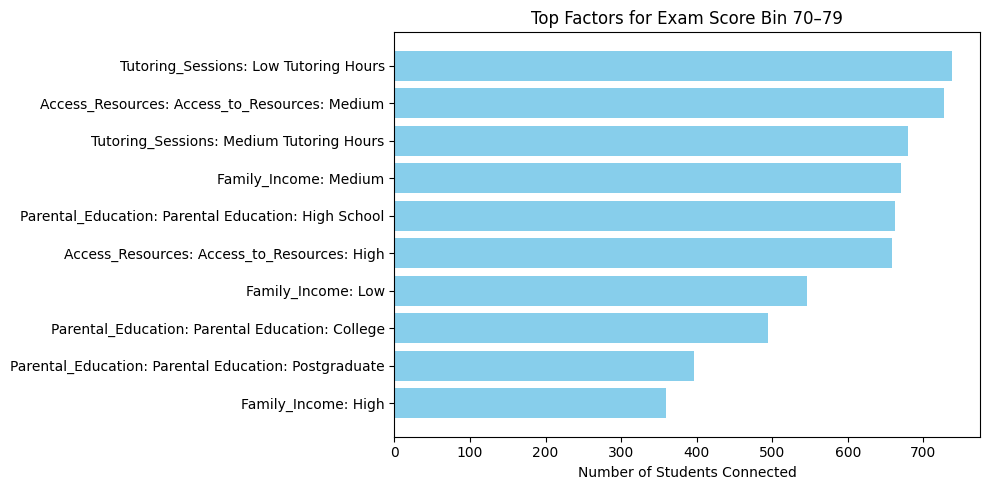

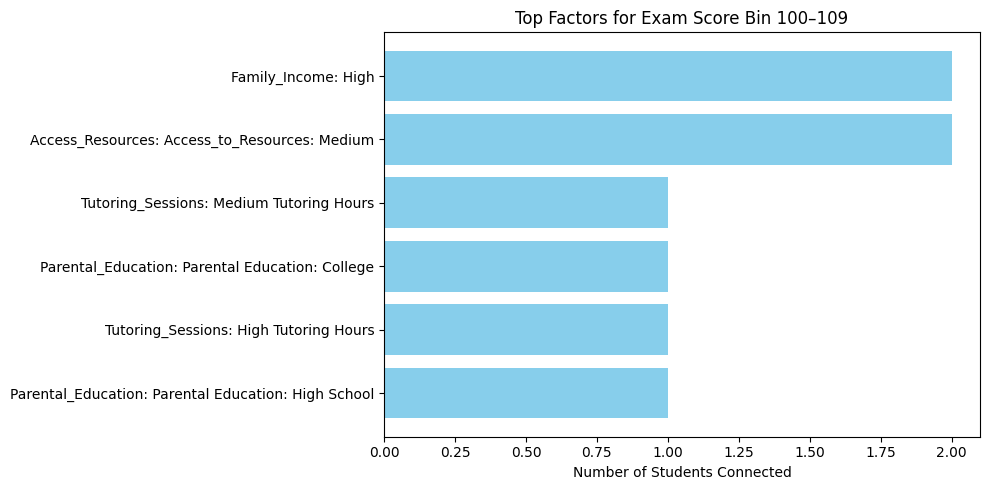

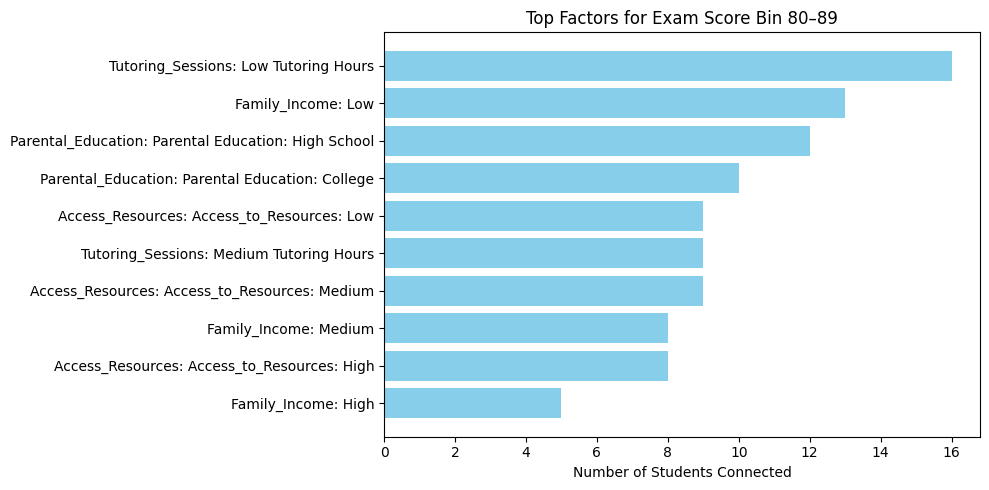

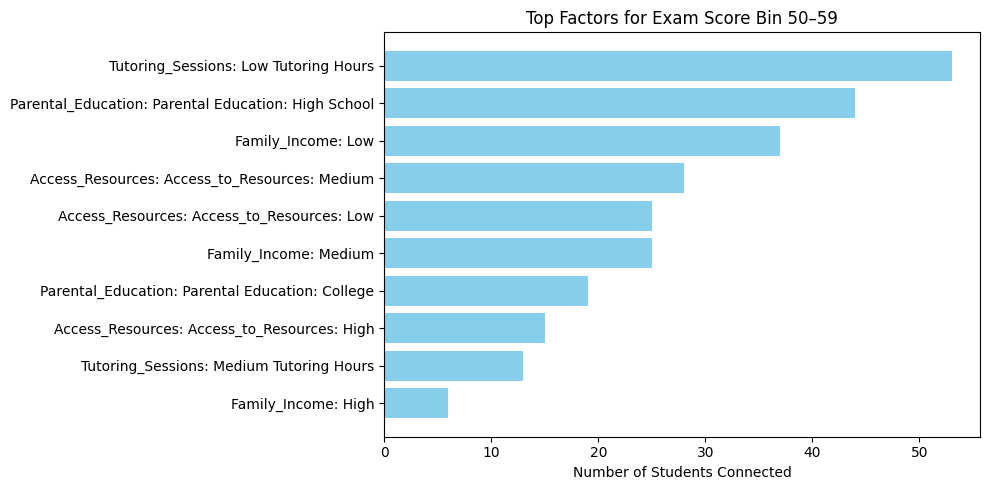

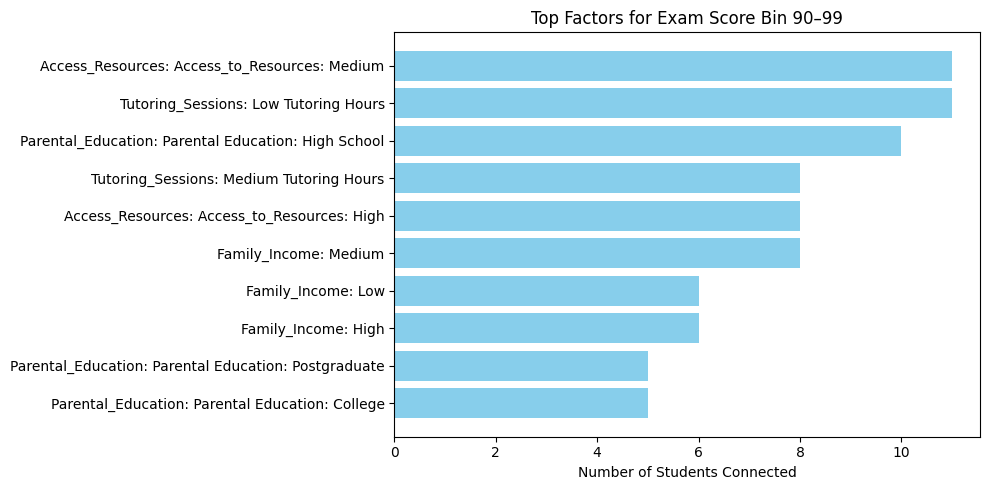

In [23]:

# Step 1: Analyze each bin
for bin_range, students in binned_students.items():
    category_counter = defaultdict(int)
    
    # Count how often each category (factor) is connected in this score bin
    for student in students:
        for neighbor in B.neighbors(student):
            if neighbor in category_nodes:
                category_counter[neighbor] += 1

    # Sort and get top N categories
    sorted_categories = sorted(category_counter.items(), key=lambda x: x[1], reverse=True)
    
    # Skip empty bins
    if not sorted_categories:
        continue

    # Prepare for plotting
    categories = [cat for cat, _ in sorted_categories[:10]]  # Top 10 factors
    counts = [count for _, count in sorted_categories[:10]]

    # Step 2: Plot
    plt.figure(figsize=(10, 5))
    plt.barh(categories, counts, color='skyblue')
    plt.xlabel("Number of Students Connected")
    plt.title(f"Top Factors for Exam Score Bin {bin_range[0]}–{bin_range[1]-1}")
    plt.gca().invert_yaxis()  # Highest on top
    plt.tight_layout()
    plt.show()


In [19]:
#df_sample = df.iloc[:100]
df = pd.read_csv('StudentPerformanceFactors.csv')

max_hours_tutoring = df['Tutoring_Sessions'].max()
df['Tuturing_Sessions_bin'] = pd.cut(df['Tutoring_Sessions'], bins=[0, max_hours_tutoring/4, max_hours_tutoring/2, max_hours_tutoring + 1], labels=['Low Tutoring Hours', 'Medium Tutoring Hours', 'High Tutoring Hours'], right=False)



df['Family_Income_bin'] = 'Family Income: ' + df['Family_Income'].astype(str)

df['Parental_Education_bin'] = 'Parental Education: ' + df['Parental_Education_Level'].astype(str)

df['Access_Resources_bin'] = 'Access_to_Resources: ' + df['Access_to_Resources'].astype(str)

G2 = nx.Graph()

# Add all nodes with attributes
for idx, row in df.iterrows():
    G2.add_node(idx, bipartite=0, exam_score=row['Exam_Score'],
                Family_Income=row['Family_Income'],
                Tutoring_Sessions=row['Tuturing_Sessions_bin'],
                Parental_Education=row['Parental_Education_bin'],
                Access_Resources=row['Access_Resources_bin'])

# Define the columns you want to match on
attributes = ['Family_Income', 'Tuturing_Sessions_bin', 'Parental_Education_bin', 'Access_Resources_bin']

# For each attribute, group by its values and connect all students in the same group
for attr in attributes:
    for _, group in df.groupby(attr):
        indices = group.index.tolist()
        # Add edges between all pairs of students in the group
        for i, j in itertools.combinations(indices, 2):
            G2.add_edge(i, j)


/var/folders/4x/tynxx6yd7zdfcrbzc6b1zbs00000gn/T/ipykernel_81508/1274746402.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in df.groupby(attr):


In [8]:
G2 = nx.Graph()

# Add all nodes with attributes
for idx, row in df.iterrows():
    G2.add_node(idx, bipartite=0, exam_score=row['Exam_Score'],
                Family_Income=row['Family_Income'],
                Tutoring_Sessions=row['Tuturing_Sessions_bin'])

# Define the columns you want to match on
attributes = ['Family_Income', 'Tuturing_Sessions_bin']

# For each attribute, group by its values and connect all students in the same group
for attr in attributes:
    for _, group in df.groupby(attr):
        indices = group.index.tolist()
        # Add edges between all pairs of students in the group
        for i, j in itertools.combinations(indices, 2):
            G2.add_edge(i, j)

/var/folders/4x/tynxx6yd7zdfcrbzc6b1zbs00000gn/T/ipykernel_81508/1842854222.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in df.groupby(attr):


In [11]:
2 * len(G2.edges()) / len(G2.nodes())

4325.168154987135